# Task 5: To Explore Business Analytics

## Perform Explanatory Data Analysis on the dataset "SampleSuperstore"

### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
data = pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.drop_duplicates(keep='first',inplace=True )

In [6]:
data.shape

(9977, 13)

In [7]:
#Checking Total Sales & Profit of the company
sales_profit = data.groupby('Segment').sum().iloc[:,[1,-1]].sum()
round(sales_profit,2)

Sales     2296195.59
Profit     286241.42
dtype: float64

### Total Sales=  USD 2296195.59
### Total Profit =  USD 286241.42

## EDA

In [8]:
Top_Sales = data.groupby('State')['Sales'].sum().sort_values(ascending = False)
Top_Profit = data.groupby('State')['Profit'].sum().sort_values(ascending = False)

Text(0, 0.5, 'Sales')

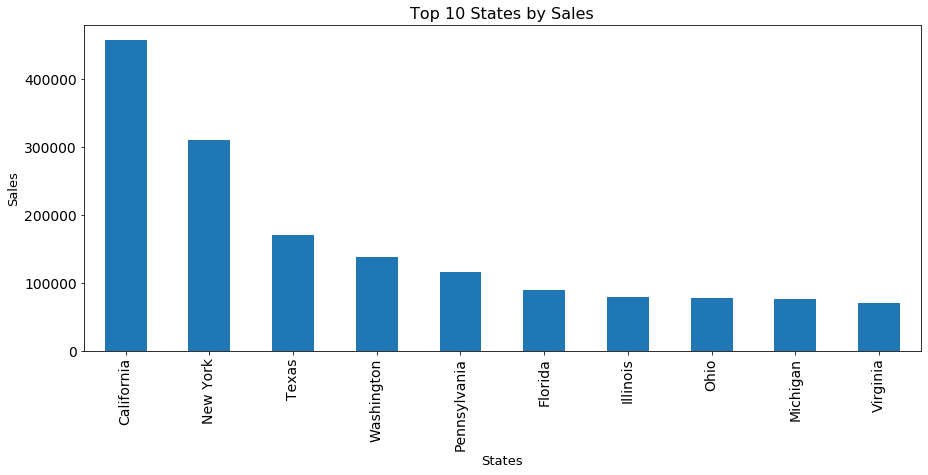

In [9]:
Top_Sales.head(10).plot(kind = 'bar',figsize = (15,6),fontsize = 14)
plt.title("Top 10 States by Sales",fontsize = 16)
plt.xlabel("States",fontsize = 13)
plt.ylabel("Sales",fontsize = 13)

Text(0, 0.5, 'Profit')

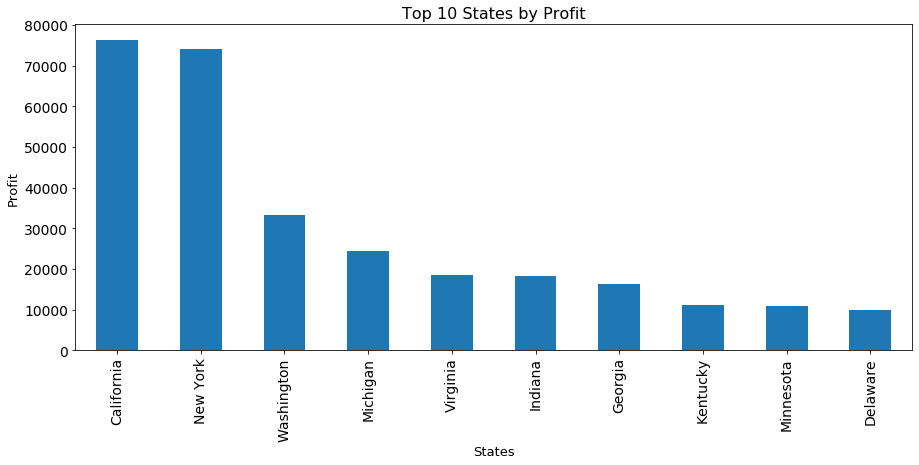

In [10]:
Top_Profit.head(10).plot(kind = 'bar',figsize = (15,6),fontsize = 14)
plt.title("Top 10 States by Profit",fontsize = 16)
plt.xlabel("States",fontsize = 13)
plt.ylabel("Profit",fontsize = 13)

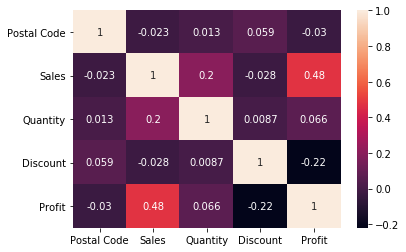

In [11]:
corr = data.corr()
sns.heatmap(corr,annot = True)

#### We can see there is negative correaltion between Discount & Sales also between Discount & Profit

#### We can say that if discount is given there is a decrease in sale and profit

### Analysing

Text(0.5, 1.0, 'Regionwise Profit in Different Segment')

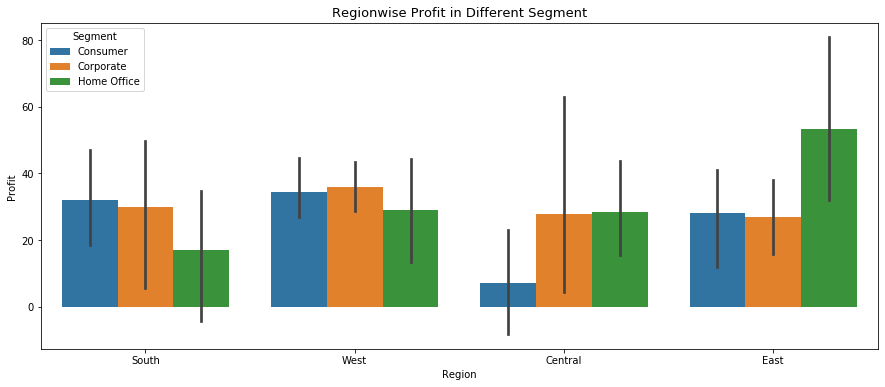

In [12]:
plt.figure(figsize=(15,6))
sns.barplot('Region','Profit',hue = 'Segment',data = data)
plt.title("Regionwise Profit in Different Segment",fontsize = 13)

#### We can see all segments are profitable but in Central Region we need to focus on Consumer Segment to increase the profit.

Text(0.5, 1.0, 'Regionwise Profit in Different Category')

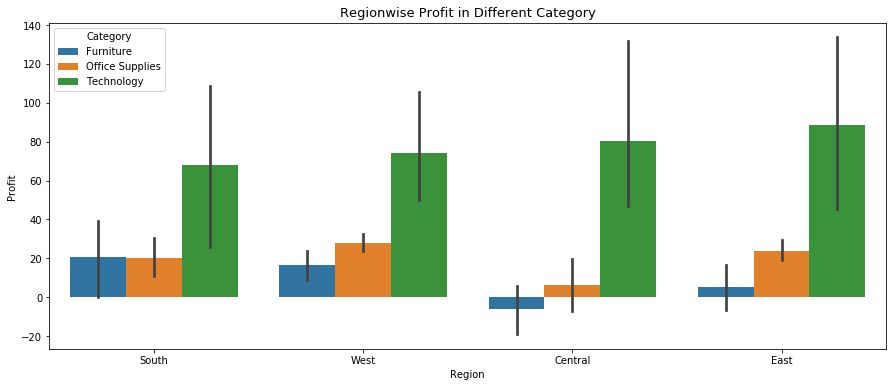

In [13]:
plt.figure(figsize=(15,6))
sns.barplot('Region','Profit',hue = 'Category',data = data)
plt.title("Regionwise Profit in Different Category",fontsize = 13)

#### We can see that Furniture Category in Central Region is only loss making category.

### Now we will analyze Central Region.

In [14]:
central_region = list(data.groupby('Region'))[0][1]

Text(0.5, 1.0, 'Categorywise Profit in Central Region through Ship Mode')

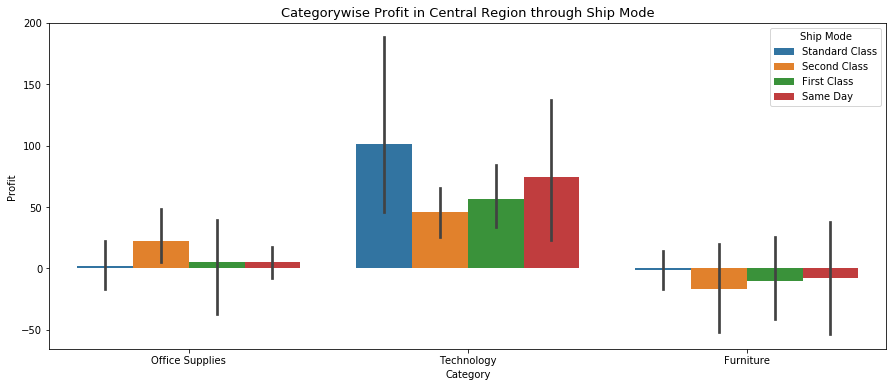

In [15]:
plt.figure(figsize=(15,6))
sns.barplot('Category','Profit',hue = 'Ship Mode',data = central_region)
plt.title('Categorywise Profit in Central Region through Ship Mode',fontsize = 13)

#### Here also we can see there is a loss only in Furniture Category in Central Region irrespective of Ship Mode.

### Analyzing Statewise performance of Furniture Category in Central Region.

In [16]:
central_region_furniture = list(list(data.groupby("Region"))[0][1].groupby("Category"))[0][1]

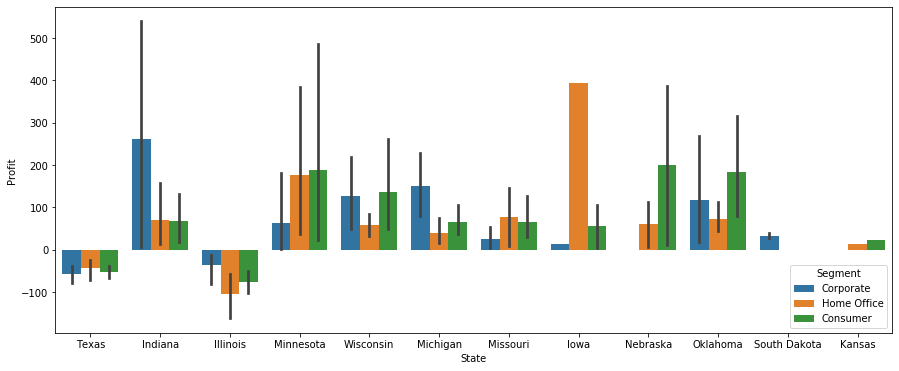

In [17]:
plt.figure(figsize=(15,6))
sns.barplot('State',"Profit", hue = 'Segment',data = central_region_furniture)

### Texas & Illinois are the only states that are incorring losses

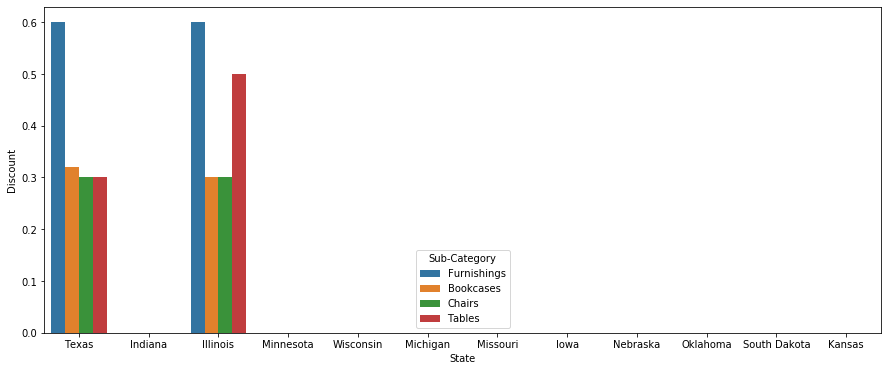

In [18]:
plt.figure(figsize=(15,6))
sns.barplot('State','Discount',hue ='Sub-Category',data = central_region_furniture )

### From above graph we can see that Texas & Illinois are the only states that are giving huge discounts and are facing losses.

## Insights
## 1)Total Profit are _USD 286241.42_ & Total Sales are _USD 2296195.59_ 
## 2) Top 10 states with Profits are
### *'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'.*
## 3) Top 10 states with Sales are 
### *'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'.*
## 4) Discounts are causing losses in Sales & Profit.
## 5) Almost all the segments are profitable.
## 6) Furniture is only loss making category that too in *Central Region*
## 7) _Texas & Illinois_ are the only states that are providing discounts and facing losses.
## The discounts are:
 ### a) 60% on Furnishings
 ### b)30% on Bookcases and Chairs
 ### c)50% disount on Tables in Illinois and 30% in Texas